# Multilayer Perceptron (MLP)

- "vanilla" feed-forward neural network

- consists of an input layer, multiple hidden layers and an output layer (deep neural network => deep learning)

- trained using the backpropagation algorithm

![MLP](../img/mlp.png)

# Forward pass

- passing data through the network until output $\hat{\mathbf{y}}$ is calculated

- matrix multiplication of an input matrix $\mathbf{X}$ and weights of every hidden layer $\mathbf{W}_n$ plus a bias vector $\mathbf{b}_n$ passed to an activation function $f_n$ until the output layer is reached

- it is quite common for the output layer to have a different activation function as compared to the hidden layers

- forward pass for the image above:

$$
\begin{align*}

\begin{aligned}
\mathbf{Z}_1 &= \mathbf{X} \cdot \mathbf{W}_1 + \mathbf{b}_1 \\
\mathbf{U}_1 &= f_1(\mathbf{Z}_1) \\
&\text{Hidden layer 1}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_2 &= \mathbf{U}_1 \cdot \mathbf{W}_2 + \mathbf{b}_2 \\
\mathbf{U}_2 &= f_2(\mathbf{Z}_2) \\
&\text{Hidden layer 2}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_3 &= \mathbf{U}_2 \cdot \mathbf{W}_3 + \mathbf{b}_3 \\
\mathbf{U}_3 &= f_3(\mathbf{Z}_3) \\
&\text{Hidden layer 3}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_4 &= \mathbf{U}_3 \cdot \mathbf{W}_4 + \mathbf{b}_4 \\
\mathbf{U}_4 &= f_4(\mathbf{Z}_4) \\
&\text{Hidden layer 4}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_5 &= \mathbf{U}_4 \cdot \mathbf{W}_5 + \mathbf{b}_5 \\
\hat{\mathbf{y}} &= f_5(\mathbf{Z}_5) \\
&\text{Output layer}
\end{aligned}

\end{align*}
$$


# Backpropagation (backward pass)

- distributing gradients backwards through the network using the chain rule

- gradient calculation starts at the output layer using the loss function $\mathcal{L}(\hat{y}, y)$

- calculated gradients of network parameters (weights $\mathbf{W}$ and biases $\mathbf{b}$) are used to minimize the loss function using gradient descent

- backward pass for the image above ($\odot$ denotes element-wise multiplication):

$$
\begin{align*}

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} &= \frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}} \cdot \frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{Z}_5} \\
&= \frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}} \odot f_5'(\mathbf{Z}_5) \\
&= \delta_{5}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_5} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{W}_5} \\
&= \mathbf{U}_{4}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_5} \\
&= \mathbf{U}_{4}^{\intercal} \cdot \delta_{5}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_5} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{b}_5} \\
&= \delta_{5} \cdot 1 \\
&= \sum \delta_{5}
\end{aligned}

\end{align*}
$$

$$
\begin{align*}

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{U}_4} &= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{U}_4} \\
&= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \mathbf{W}_{5}^{\intercal} \\
&= \delta_{5} \cdot \mathbf{W}_{5}^{\intercal}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_4} &= \frac{\partial \mathcal{L}}{\partial \mathbf{U}_4} \cdot \frac{\partial \mathbf{U}_4}{\partial \mathbf{Z}_4} \\
&= \left( \delta_{5} \cdot \mathbf{W}_{5}^{\intercal} \right) \odot f_4'(Z_4)\\
&= \delta_{4}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_4} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_4} \cdot \frac{\partial \mathbf{Z}_4}{\partial \mathbf{W}_4} \\
&= \mathbf{U}_{3}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_4} \\
&= \mathbf{U}_{3}^{\intercal} \cdot \delta_{4}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_4} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_4} \cdot \frac{\partial \mathbf{Z}_4}{\partial \mathbf{b}_4} \\
&= \delta_{4} \cdot 1 \\
&= \sum \delta_{4}
\end{aligned}

\end{align*}
$$

$$\vdots$$
$$\vdots$$

$$
\begin{align*}

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{U}_1} &= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_2} \cdot \frac{\partial \mathbf{Z}_2}{\partial \mathbf{U}_1} \\
&= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_2} \cdot \mathbf{W}_{2}^{\intercal} \\
&= \delta_{2} \cdot \mathbf{W}_{2}^{\intercal}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} &= \frac{\partial \mathcal{L}}{\partial \mathbf{U}_1} \cdot \frac{\partial \mathbf{U}_1}{\partial \mathbf{Z}_1} \\
&= \left( \delta_{2} \cdot \mathbf{W}_{2}^{\intercal} \right) \odot f_1'(Z_1)\\
&= \delta_{1}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_1} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} \cdot \frac{\partial \mathbf{Z}_1}{\partial \mathbf{W}_1} \\
&= \mathbf{X}^{\intercal} \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} \\
&= \mathbf{X}^{\intercal} \cdot \delta_{1}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} \cdot \frac{\partial \mathbf{Z}_1}{\partial \mathbf{b}_1} \\
&= \delta_{1} \cdot 1 \\
&= \sum \delta_{1}
\end{aligned}

\end{align*}
$$

# Gradient descent

- the most common training algorithm

- updates network parameters iteratively using gradients calculated in backpropagation to minimize the loss function $L$

- general formula:

$$ \text{new parameters} = \text{old parameters} - \text{learning rate} \cdot \text{gradient of old parameters}$$
$$ \mathbf{W}_{\text{new}} = \mathbf{W}_{\text{old}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}_{\text{old}}}$$
$$ \mathbf{b}_{\text{new}} = \mathbf{b}_{\text{old}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}_{\text{old}}}$$

# Layer

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from dlfs.base import Layer

class DenseLayer(Layer):
    
    def __init__(self, n_inputs: int, n_neurons: int) -> None:
        """
        Layer of neurons consisting of a weight matrix and bias vector.

        Parameters
        ----------
        n_inputs : int
            Number of inputs that connect to the layer.

        n_neurons : int
            Number of neurons the layer consists of.

        Attributes
        ----------
        weights : numpy.ndarray
            Matrix of weight coefficients.

        biases : numpy.ndaray
            Vector of bias coefficients.
        """

        # Weights are randomly initialized, small random numbers seem to work well
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        # Bias vector is initialized to a zero vector
        self.biases = np.zeros(n_neurons)

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the dense layer. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Store inputs for later use (backpropagation)
        self.inputs = inputs
        # Output is the dot product of the input matrix and weights plus biases
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the dense layer. Creates gradient attributes with respect to layer weights, biases and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        self.dweights = np.dot(self.inputs.T, delta)
        self.dbiases = np.sum(delta, axis=0)
        self.dinputs = np.dot(delta, self.weights.T)

# Activation functions

In [16]:
from dlfs.base import Activation

class Linear(Activation):

    def __init__(self) -> None:
        """
        Linear activation function.
        """
        pass

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using Linear activation. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        self.inputs = inputs
        self.output = inputs

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using Linear activation. Creates gradient attribute with respect to inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Derivative of Linear activation
        self.dinputs = delta

class ReLU(Activation):

    def __init__(self) -> None:
        """
        Rectified Linear Unit activation function.
        """
        pass

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using ReLU. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Store inputs for later use (backpropagation)
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using ReLU. Creates gradient attribute with respect to inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        self.dinputs = delta.copy()
        # Derivative of ReLU
        self.dinputs[self.inputs < 0] = 0

class Sigmoid(Activation):

    def __init__(self) -> None:
        """
        Sigmoid activation function.
        """
        pass

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using Sigmoid. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using Sigmoid. Creates gradient attribute with respect to inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Derivative of Sigmoid
        self.dinputs = delta * (1 - self.output) * self.output

# Loss functions

In [17]:
from dlfs.base import Loss

class BCE_Loss(Loss):

    def __init__(self) -> None:
        """
        Binary Cross Entropy loss function.
        """
        pass

    def calculate(self, y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """
        Calculate Binary Cross Entropy loss.

        Parameters
        ----------
        y_pred : np.ndarray
            Predicted values.

        y_true : np.ndarray
            True values.

        Returns
        -------
        loss : float
        """
        # Clip y_pred so logarithm doesn't become unstable
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        loss = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
        return np.mean(loss)
    
    def backward(self, y_pred: np.ndarray, y_true: np.ndarray) -> None:
        """
        Backward pass using Binary Cross Entropy loss. Creates gradient attribute with respect to predicted values.

        Parameters
        ----------
        y_pred : np.ndarray
            Predicted values.

        y_true : np.ndarray
            True values.

        Returns
        -------
        None
        """
        # Clip y_pred so the denominator doesn't become unstable
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        # Derivative of BCE with respect to y_pred
        self.dinputs = (y_pred_clipped - y_true) / (y_pred_clipped * (1 - y_pred_clipped))

class MSE_Loss(Loss):

    def __init__(self) -> None:
        """
        Mean Squared Error loss function.
        """
        pass

    def calculate(self, y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """
        Calculate Mean Squared Error loss.

        Parameters
        ----------
        y_pred : np.ndarray
            Predicted values.

        y_true : np.ndarray
            True values.

        Returns
        -------
        loss : float
        """
        loss = 0.5 * (y_pred - y_true)**2
        return np.mean(loss)
    
    def backward(self, y_pred: np.ndarray, y_true: np.ndarray) -> None:
        """
        Backward pass using Mean Squared Error loss. Creates gradient attribute with respect to predicted values.

        Parameters
        ----------
        y_pred : np.ndarray
            Predicted values.

        y_true : np.ndarray
            True values.

        Returns
        -------
        None
        """
        # Derivative of MSE with respect to y_pred
        self.dinputs = (y_pred - y_true)

# Optimizer

In [18]:
from dlfs.base import Optimizer

class Optimizer_SGD(Optimizer):

    def __init__(self, learning_rate: float = 1e-3, momentum: float = 0, decay: float = 0) -> None:
        """
        Stochastic gradient descent optimizing algorithm with momentum and decay.

        Parameters
        ----------
        learning_rate : float, default=0.001
            Step size used in gradient descent.

        momentum : float, default=0
            Factor used to scale past gradients.

        decay : float, default=0
            Factor used to reduce learning rate over time.

        Attributes
        ----------
        iterations : int, default=0
            Number of training iterations used to calculate new learning rate with decay.
        """
        self.learning_rate = learning_rate
        self._current_learning_rate = learning_rate
        self.momentum = momentum
        self.decay = decay
        self._iterations = 0

    def update_parameters(self) -> None:
        """
        Method for updating current learning rate.

        Returns
        -------
        None
        """
        if self.decay:
            # Inverse decay method
            self._current_learning_rate = self.learning_rate  / (1 + self._iterations * self.decay)

    def update_layer_parameters(self, layer: Layer) -> None:
        """
        Method for updating layer parameters.

        Parameters
        ----------
        layer : Layer
            Layer that is being updated.

        Returns
        -------
        None
        """

        if self.momentum:

            # If the layer doesn't have momentum attribute initialize it
            if not hasattr(layer, 'weight_momentum'):
                layer.weight_momentum = np.zeros_like(layer.weights)
                layer.bias_momentum = np.zeros_like(layer.biases)

            layer.weight_momentum = self.momentum * layer.weight_momentum - self._current_learning_rate * layer.dweights
            layer.bias_momentum = self.momentum * layer.bias_momentum - self._current_learning_rate * layer.dbiases

            weight_updates = layer.weight_momentum
            bias_updates = layer.bias_momentum

        else:

            # If there is no momentum update weights using vanilla gradient descent
            weight_updates = -self._current_learning_rate * layer.dweights
            bias_updates = -self._current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

# Model

In [19]:
class Model:

    def __init__(self, layers: list[Layer | Activation] = None, loss_function: Loss = None, optimizer: Optimizer = None) -> None:
        """
        Neural network model.

        Parameters
        ----------
        layers : list, default=None
            List of layers and activation functions.

        loss_function : Loss, default=None
            Loss function.
        
        optimizer : Optimizer, default=None
            Optimizer algorithm.
        """
        if layers is None:
            self.layers = []
        else:
            self.layers = layers
        self.loss_function = loss_function
        self.optimizer = optimizer

    def _forward(self, X: np.ndarray) -> None:
        """
        Forward pass.

        Parameters
        ----------
        X : np.ndarray
            Input values.

        Returns
        -------
        None
        """

        # Pass data to the input layer
        self.layers[0].forward(X)

        # Forward data through all the layers
        for idx, layer in enumerate(self.layers[1:], start=1):
            layer.forward(self.layers[idx - 1].output)

        # Output of the model is the output of the last layer
        self.output = self.layers[-1].output

    def _backward(self, y: np.ndarray) -> None:
        """
        Backward pass.
        
        Parameters
        ----------
        y : np.ndarray
            Output values.

        Returns
        -------
        None
        """

        # Backward pass starts with loss function gradient calculation
        self.loss_function.backward(self.output, y)
        self.layers[-1].backward(self.loss_function.dinputs)

        # Pass gradients backwards to all layers
        for idx, layer in reversed(list(enumerate(self.layers[:-1]))):
            layer.backward(self.layers[idx + 1].dinputs)

    def _update_model_parameters(self) -> None:
        """
        Method for updating model parameters (weights and biases).

        Returns
        -------
        None
        """

        # Loop through all layers
        for layer in self.layers:
            # If the layer has weights attribute we can update it
            if hasattr(layer, 'weights'):
                self.optimizer.update_layer_parameters(layer)

        self.optimizer.update_parameters()

    def train(self, X: np.ndarray, y: np.ndarray, iterations: int = 1000, print_every: int = None) -> None:
        """
        Train the model.

        Parameters
        ----------
        X : np.ndarray
            Input values.

        y : np.ndarray
            Output values.

        iterations : int, default=1000
            Number of training iterations.

        print_every : int, default=None
            If given an integer, prints loss value.

        Returns
        -------
        None
        """

        for i in range(iterations):

            # Forward pass
            self._forward(X)

            if print_every is not None:
                if not i % print_every:
                    print(f'Loss: {self.loss_function.calculate(self.output, y)}')

            # Backward pass
            self._backward(y)

            # Update parameters
            self._update_model_parameters()

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the model.

        Parameters
        ----------
        X : np.ndarray
            Input values.

        Returns
        -------
        prediction : np.ndarray
        """
        self._forward(X)
        return self.output
    
    def add(self, layer : Layer | Activation) -> None:
        """
        Add layer to the network.

        Parameters
        ----------
        layer : DenseLayer | Activation_Function
            Layer to add.

        Returns
        -------
        None
        """
        self.layers.append(layer)

# Function for 2D plotting

In [20]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

# Simple XOR dataset for classification

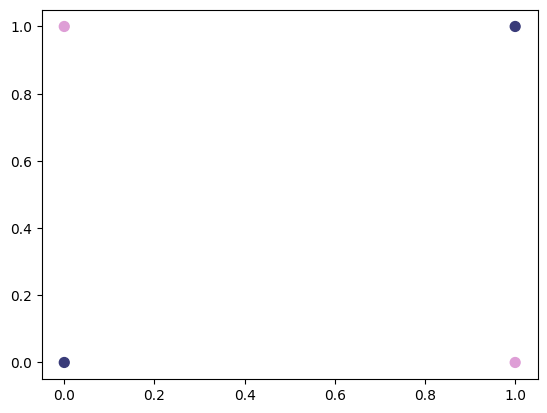

In [21]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

plot_2d_clf_problem(X, y)

Loss: 0.6973317617908914
Loss: 0.6930966159919535
Loss: 0.04950186396920762
Loss: 0.0067196811831237695
Accuracy: 1.0


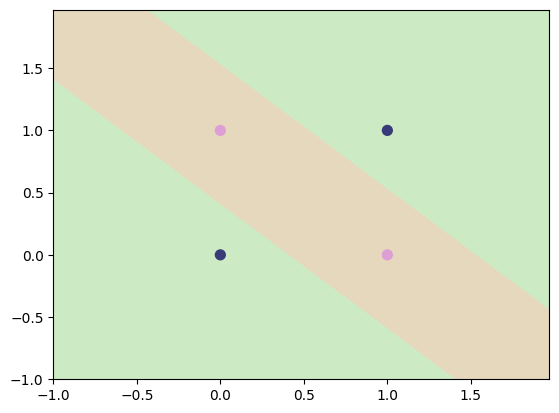

In [22]:
model = Model(loss_function=BCE_Loss(), optimizer=Optimizer_SGD(learning_rate=5e-1, momentum=0., decay=0.))

model.add(DenseLayer(2, 8))
model.add(Sigmoid())
model.add(DenseLayer(8, 1))
model.add(Sigmoid())

model.train(X, y.reshape(-1, 1), iterations=2000, print_every=500)
print(f'Accuracy: {np.mean(y.reshape(-1, 1) == np.round(model.predict(X)))}')
plot_2d_clf_problem(X, y, lambda x: model.predict(x) > 0.5)

# Nonlinear circles dataset for classification

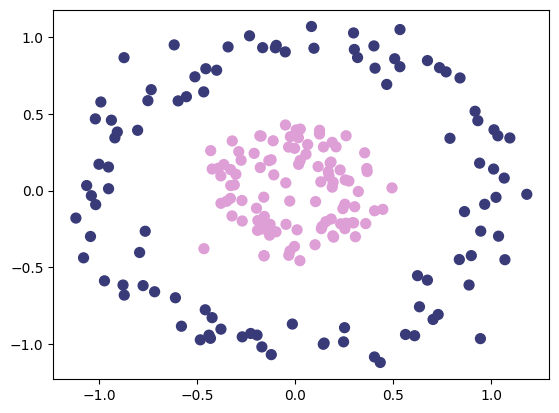

In [23]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=50)
plot_2d_clf_problem(X, y)

Accuracy: 1.0


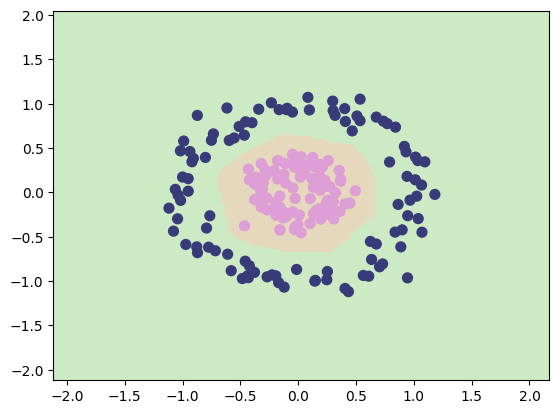

In [24]:
layers = [DenseLayer(2, 16), 
          ReLU(),
          DenseLayer(16, 16), 
          ReLU(), 
          DenseLayer(16, 1), 
          Sigmoid()]

model = Model(layers=layers, loss_function=BCE_Loss(), optimizer=Optimizer_SGD(learning_rate=5e-3, momentum=0.3, decay=1e-2))

model.train(X, y.reshape(-1, 1))
print(f'Accuracy: {np.mean(y.reshape(-1, 1) == np.round(model.predict(X)))}')
plot_2d_clf_problem(X, y, lambda x: model.predict(x) > 0.5)

# Simple regression dataset

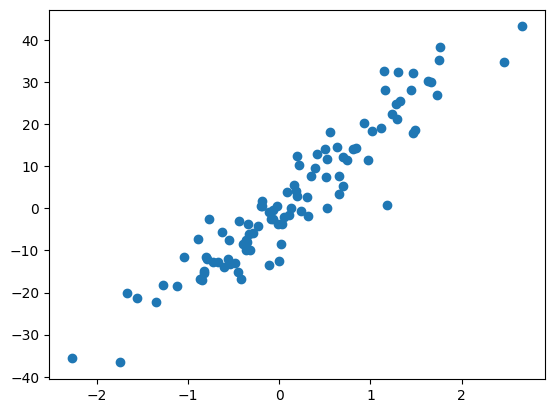

In [25]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1, n_informative=1, n_targets=1, noise=5.3, random_state=52)

plt.scatter(X, y)
plt.show()

Loss: 140.39288185590922
Loss: 14.439416089229475


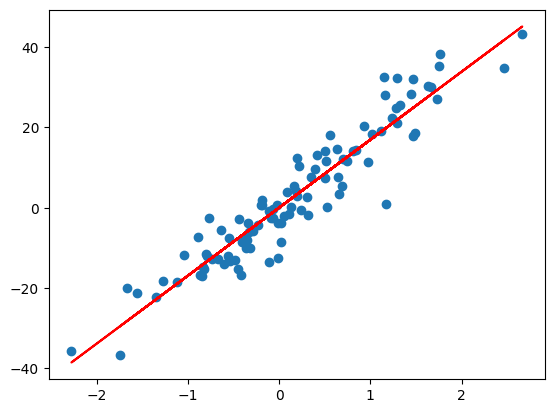

In [26]:
layers = [DenseLayer(1, 1)]

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=1e-3, momentum=0., decay=0.))

model.train(X, y.reshape(-1, 1), print_every=500, iterations=1000)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()

# Complex regression dataset

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape, y.shape)

(20640, 8) (20640,)


In [28]:
layers = [DenseLayer(8, 16),
          ReLU(),
          DenseLayer(16, 1),
          Linear()
          ]

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=1e-5, momentum=0., decay=0.))

model.train(X, y.reshape(-1, 1), print_every=500)

Loss: 2.7771651939891204
Loss: 0.19569344801099953
